# Image Analysis and Processing
##  2nd Assignment


 **1. Explore the Data and Define Appropriate Classes**

Load the Dataset

In [13]:
import os
import glob

# Define the paths to the images folders
train_pneumonia_path = 'images/train/pneumonia/'
train_normal_path = 'images/train/normal/'
test_pneumonia_path = 'images/test/pneumonia/'
test_normal_path = 'images/test/normal/'

# Get the list of image files in each category
train_pneumonia_images = glob.glob(train_pneumonia_path + '*.jpeg')
train_normal_images = glob.glob(train_normal_path + '*.jpeg')
test_pneumonia_images = glob.glob(test_pneumonia_path + '*.jpeg')
test_normal_images = glob.glob(test_normal_path + '*.jpeg')


Explore the Data to get a better understanding of its characteristics.

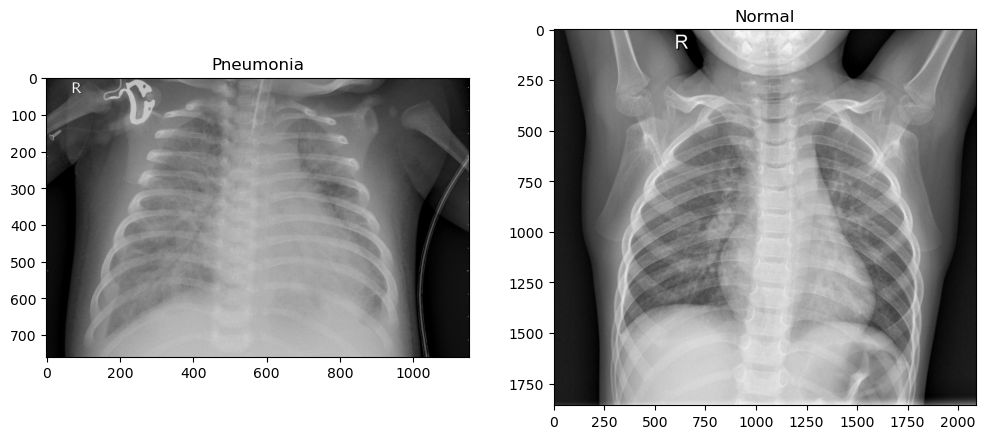

Number of pneumonia samples: 3875
Number of normal samples: 1341
Class imbalance ratio: 0.35


In [14]:
import matplotlib.pyplot as plt
import cv2  # OpenCV for image manipulation

# Visualize a few sample images
sample_pneumonia_image = cv2.imread(train_pneumonia_images[0])
sample_normal_image = cv2.imread(train_normal_images[0])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sample_pneumonia_image, cv2.COLOR_BGR2RGB))
plt.title('Pneumonia')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sample_normal_image, cv2.COLOR_BGR2RGB))
plt.title('Normal')
plt.show()

# Check the distribution of classes
num_pneumonia_samples = len(train_pneumonia_images)
num_normal_samples = len(train_normal_images)

print(f'Number of pneumonia samples: {num_pneumonia_samples}')
print(f'Number of normal samples: {num_normal_samples}')

# Calculate the class imbalance ratio
class_imbalance_ratio = num_normal_samples / num_pneumonia_samples
print(f'Class imbalance ratio: {class_imbalance_ratio:.2f}')


 **2. Visualize Data and Employ Appropriate Preprocessing**
 
The code starts by randomly selecting 9 image from each class (e.g., "normal" and "pneumonia"). This is done by navigating to the folder containing the images for each class.
The code uses the OpenCV library (cv2) to read the randomly selected image.

Next, the code applies a conversion of the image from the BGR color space to the RGB color space. This is done to ensure accurate color representation.

In [23]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)


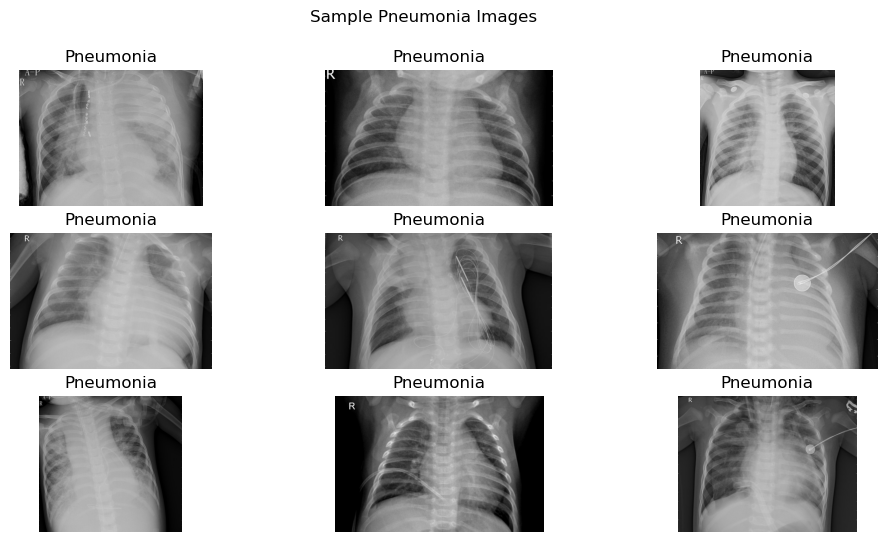

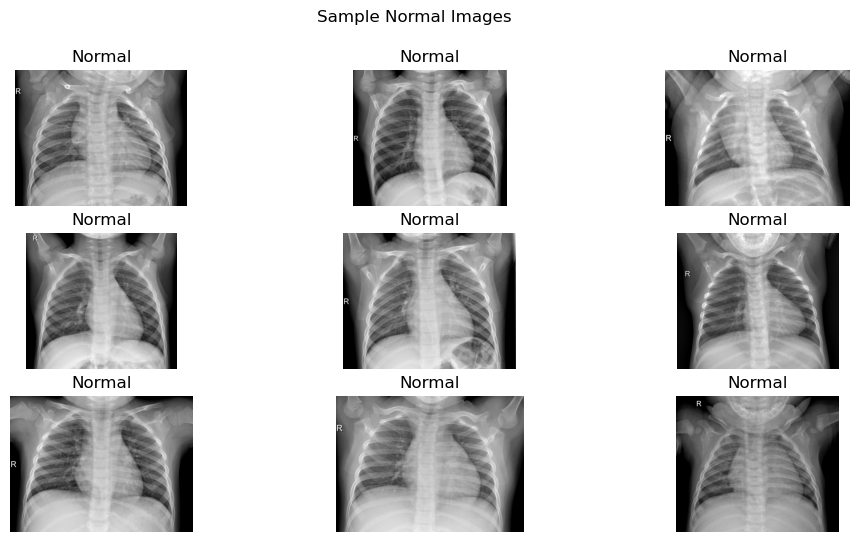

In [32]:
import matplotlib.pyplot as plt
import cv2
import random

# Define a function to display a grid of images
def plot_images(images, labels, title):
    plt.figure(figsize=(12, 6))
    
    # Check if there are enough images to display
    if len(images) < 9:
        raise ValueError("Not enough images to display")
    
    # Shuffle the list of images
    random.shuffle(images)
    
    for i in range(9):  # Display the first 9 images
        plt.subplot(3, 3, i+1)
        image = cv2.imread(images[i])
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display a grid of pneumonia images
plot_images(train_pneumonia_images, ['Pneumonia']*9, 'Sample Pneumonia Images')

# Display a grid of normal images
plot_images(train_normal_images, ['Normal']*9, 'Sample Normal Images')


In this code we using the TensorFlow and Keras library for deep learning to set up data generators for image preprocessing and augmentation. 
<p> The code starts by importing the necessary libraries, including ImageDataGenerator from TensorFlow Keras. This class is used to create data generators for image preprocessing.</p>
<p> <b> batch_size:</b> This parameter specifies the number of images to be processed in each batch during training. </p>
<p> <b> rescale=1./255: </b> This scales the pixel values of images to the range [0, 1] by dividing them by 255, effectively normalizing the images. </p>
<p> <b> rotation_range=20:</b> Randomly rotates images by up to 20 degrees </p>
<p> <b> rotation_range=20:</b> Randomly rotates images by up to 20 degrees.</p>
<p> <b> width_shift_range=0.2 </b>and height_shift_range=0.2: Randomly shifts the width and height of images by up to 20%.</p>
<p> <b> shear_range=0.2: </b>Randomly applies shearing transformations.</p>
<p> <b> zoom_range=0.2: </b>Randomly zooms into images.</p>
<p> <b> horizontal_flip=True:</b> Randomly flips images horizontally.</p>
<p> <b> fill_mode='nearest':</b> This option specifies how to fill in missing pixels when applying transformations.</p>



In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image preprocessing parameters
image_size = (224, 224)
batch_size = 32

# Create data generators for training and testing with preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of images
    height_shift_range=0.2, # Randomly shift the height of images
    shear_range=0.2,        # Randomly apply shearing transformations
    zoom_range=0.2,         # Randomly zoom into images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill missing pixels using the nearest available pixel
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing

# Create generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    'images/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # For binary classification, use 'binary'
)

test_generator = test_datagen.flow_from_directory(
    'images/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**3. Develop the Detection Algorithms**
    
__3.1__ Using Features and Classical Machine Learning Techniques

For feature-based detection, you can extract various image features (e.g., texture, shape) and train a classifier like SVM or Random Forest.
<p> <b> extract_features(image_path): </b> This function takes an image path as input and extracts a set of features from that image. The features extracted include GLCM texture features (contrast, energy, and homogeneity), as well as basic image statistics (mean pixel value and standard deviation). </p>
    
 Here's what it does:
    
1. Loads the image in grayscale using OpenCV.
2. Computes the Gray-Level Co-occurrence Matrix (GLCM) for the image with specified parameters.
3. Calculates GLCM texture features (contrast, energy, and homogeneity) using the graycoprops function from scikit-image.
4. Computes basic image statistics: the mean pixel value and standard deviation.
5. Returns these features as a list. 

<p>Features and labels are extracted for both the training and testing datasets: </p>
For each pneumonia image in the training set, features are extracted using the extract_features function, and the label '1' is appended to train_labels to represent the 'pneumonia' class.
For each normal image in the training set, features are extracted, and the label '0' is appended to train_labels to represent the 'normal' class.
The same process is repeated for the testing set, with features and labels being appended to test_features and test_labels, respectively.
<p>The training and testing datasets are combined, and the data is split into training and testing sets using train_test_split from scikit-learn. An 80-20 split is used, with 80% of the data for training and 20% for testing. The random seed (random_state) is set to 42 for reproducibility. </p>
<p> The accuracy of the model's predictions compared to the true labels is calculated using accuracy_score from scikit-learn.
A classification report is generated using classification_report from scikit-learn. This report provides metrics like precision, recall, F1-score, and support for each class (0 for 'normal' and 1 for 'pneumonia'). </p>


In [68]:
!ppip install --user --upgrade scikit-image


In [79]:
import os
import cv2
import numpy as np

from skimage.feature import graycomatrix, graycoprops
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define a function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute GLCM (Gray-Level Co-occurrence Matrix)
    glcm = graycomatrix(image, [1], [0], symmetric=True, normed=True)
    
    # Calculate GLCM texture features
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    
    # Calculate basic image statistics
    mean_pixel_value = np.mean(image)
    std_deviation = np.std(image)
    
    # Return a list of extracted features
    return [contrast, energy, homogeneity, mean_pixel_value, std_deviation]

# Define the paths to your dataset folders
train_pneumonia_path = 'images/train/pneumonia/'
train_normal_path = 'images/train/normal/'
test_pneumonia_path = 'images/test/pneumonia/'
test_normal_path = 'images/test/normal/'

# Load the file paths for training and testing images
train_pneumonia_images = [os.path.join(train_pneumonia_path, filename) for filename in os.listdir(train_pneumonia_path)]
train_normal_images = [os.path.join(train_normal_path, filename) for filename in os.listdir(train_normal_path)]
test_pneumonia_images = [os.path.join(test_pneumonia_path, filename) for filename in os.listdir(test_pneumonia_path)]
test_normal_images = [os.path.join(test_normal_path, filename) for filename in os.listdir(test_normal_path)]

# Extract features for the training set and create labels
train_features = []
train_labels = []

for image_path in train_pneumonia_images:
    features = extract_features(image_path)
    train_features.append(features)
    train_labels.append(1)  # Pneumonia class

for image_path in train_normal_images:
    features = extract_features(image_path)
    train_features.append(features)
    train_labels.append(0)  # Normal class

# Extract features for the testing set and create labels
test_features = []
test_labels = []

for image_path in test_pneumonia_images:
    features = extract_features(image_path)
    test_features.append(features)
    test_labels.append(1)  # Pneumonia class

for image_path in test_normal_images:
    features = extract_features(image_path)
    test_features.append(features)
    test_labels.append(0)  # Normal class

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features + test_features, train_labels + test_labels, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9289383561643836
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       304
           1       0.93      0.97      0.95       864

    accuracy                           0.93      1168
   macro avg       0.92      0.89      0.90      1168
weighted avg       0.93      0.93      0.93      1168



__3.2__ Using a Neural Network Architecture

This code creates, trains, and evaluates a CNN model for the detection of pneumonia in X-ray images using TensorFlow and Keras.
* The code sets up data generators using the ImageDataGenerator class from Keras.
* Images are rescaled to have pixel values in the range [0, 1].
* Data is split into training (80%) and validation (20%) subsets.
* Various data augmentation techniques are applied, including rotation, width and height shifting, shearing, zooming, horizontal flipping, and nearest pixel filling.
* The CNN model is defined using the Keras Sequential API.
* It includes three convolutional layers with max-pooling layers in between.
* The final layer is a fully connected (Dense) layer used for classification.
* The model is trained using the training data generated by the data generator.
* The number of training epochs is set to 10.

In [52]:
!pip install tensorflow


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # adjust size as needed
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Create a CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", test_accuracy)


Found 4673 images belonging to 2 classes.
Found 1167 images belonging to 2 classes.
Epoch 1/10
147/147 [==============================] - 227s 2s/step - loss: 0.3828 - accuracy: 0.8902 - val_loss: 0.3410 - val_accuracy: 0.8937
Epoch 2/10
147/147 [==============================] - 275s 2s/step - loss: 0.3555 - accuracy: 0.8930 - val_loss: 0.3426 - val_accuracy: 0.8937
Epoch 3/10
147/147 [==============================] - 267s 2s/step - loss: 0.3493 - accuracy: 0.8930 - val_loss: 0.3434 - val_accuracy: 0.8937
Epoch 4/10
147/147 [==============================] - 259s 2s/step - loss: 0.3540 - accuracy: 0.8930 - val_loss: 0.3470 - val_accuracy: 0.8937
Epoch 5/10
147/147 [==============================] - 273s 2s/step - loss: 0.3537 - accuracy: 0.8930 - val_loss: 0.3490 - val_accuracy: 0.8937
Epoch 6/10
147/147 [==============================] - 270s 2s/step - loss: 0.3605 - accuracy: 0.8930 - val_loss: 0.3408 - val_accuracy: 0.8937
Epoch 7/10
147/147 [==============================] - 264s

In [1]:
!pip install tensorflow numpy pandas matplotlib scikit-learn


**4. Results**


<p> The confusion matrix visually represents how many instances were correctly or incorrectly classified for each class. It helps in understanding the performance of a classification model by showing where the model makes errors. </p>


Accuracy: 0.9722222222222222

 Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       287
           1       0.98      0.98      0.98       757

    accuracy                           0.97      1044
   macro avg       0.97      0.96      0.96      1044
weighted avg       0.97      0.97      0.97      1044


 Confusion Matrix:
[[270  17]
 [ 12 745]]


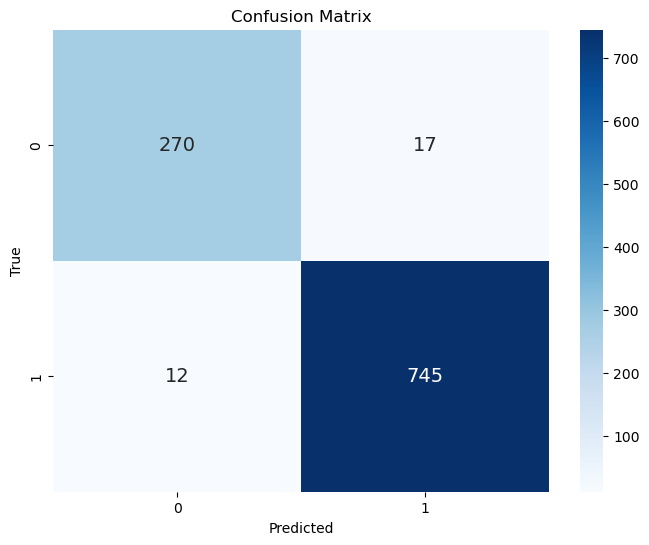

In [11]:
import os
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Define a function to extract texture features from an image
def extract_texture_features(image_path):
    # Load the image and convert to grayscale
    image = cv2.imread(image_path)
    gray_image = rgb2gray(image)
    
    # Convert the grayscale image to uint8
    gray_image = (gray_image * 255).astype(np.uint8)
    
    # Compute GLCM (Gray-Level Co-occurrence Matrix)
    glcm = graycomatrix(gray_image, [1], [0], symmetric=True, normed=True)
    
    # Calculate GLCM texture features
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    
    return [contrast, energy, homogeneity]

# Define the paths to your dataset folders
train_dir = 'images/train'
test_dir = 'images/test'

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Traverse the train directory to collect image paths and labels
for class_label in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_label)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image_paths.append(image_path)
        labels.append(class_label)

# Extract features for each image in the dataset
features = []
for image_path in image_paths:
    features.append(extract_texture_features(image_path))

# Convert labels to numeric format (e.g., 0 for 'normal', 1 for 'pneumonia')
label_map = {'normal': 0, 'pneumonia': 1}
numeric_labels = [label_map[label.lower()] for label in labels]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, numeric_labels, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate a classification report
report = classification_report(y_test, predictions)

# Generate a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the results
print("Accuracy:", accuracy)
print("\n Classification Report: \n", report)
print("\n Confusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
